In [335]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from matplotlib.image import imread
import os
import urllib.request
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [5]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [16]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [18]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

In [20]:
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [22]:
y_pred

array([0, 0, 4, ..., 3, 4, 0], dtype=int32)

In [24]:
y_pred is kmeans.labels_

True

In [26]:
kmeans.cluster_centers_

array([[-2.80214068,  1.55162671],
       [-0.06538071,  2.1042816 ],
       [-1.47468607,  2.28399066],
       [-2.79290307,  2.79641063],
       [ 0.47160085,  2.41486503]])

In [28]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [30]:
kmeans.predict(X_new)

array([1, 4, 3, 3], dtype=int32)

In [32]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

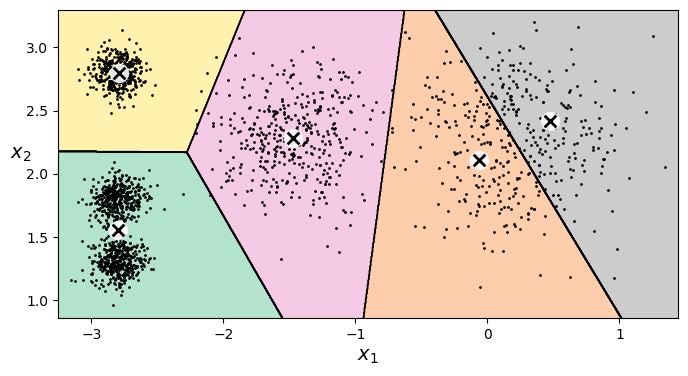

In [34]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [36]:
kmeans.transform(X_new)

array([[2.83778629, 0.12308245, 1.50178217, 2.9042344 , 0.62810856],
       [5.81943941, 3.06715398, 4.48368889, 5.84739223, 2.56220906],
       [1.4618254 , 3.06827343, 1.685008  , 0.29040966, 3.52056748],
       [0.96879317, 2.9611794 , 1.54053323, 0.36159148, 3.47264459]])

In [38]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [48]:
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

In [52]:
kmeans.score(X)

-211.59853725816834

In [56]:
silhouette_score(X, kmeans.labels_)

0.6555176425728279

In [72]:
PROJECT_ROOT_DIR = "."
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x16c3911c0>)

In [75]:
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [77]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [79]:
segmented_img.shape

(533, 800, 3)

In [83]:
X_digits, y_digits = load_digits(return_X_y=True)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [95]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [99]:
log_reg.score(X_test, y_test)

0.96

In [123]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])

In [125]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [127]:
pipeline.score(X_test, y_test)

0.9666666666666667

In [129]:
param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [131]:
 grid_clf.best_params_

{'kmeans__n_clusters': 64}

In [133]:
grid_clf.score(X_test, y_test)

0.9711111111111111

In [135]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [137]:
log_reg.score(X_test, y_test)

0.88

In [141]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digits_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digits_idx]

In [149]:
y_representative_digits = np.array([6, 3, 1, 9, 0, 4, 7, 5, 3, 0, 2, 4, 2, 3, 8, 9,
                                   5, 8, 7, 6, 7, 4, 1, 2, 1, 1, 5, 7, 1, 8, 3, 6, 8,
                                   0, 2, 6, 5, 9, 8, 7, 4, 3, 7, 5, 1, 7, 7, 6, 1, 6])

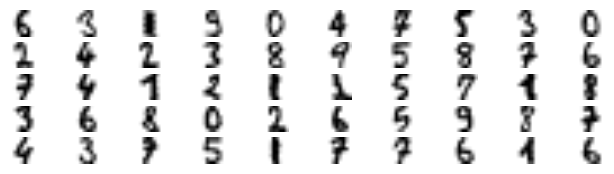

In [151]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [153]:
log_reg = LogisticRegression()

In [155]:
log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression()

In [157]:
log_reg.score(X_test, y_test)

0.9155555555555556

In [163]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [167]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.92

In [169]:
percentile_closest = 20

In [201]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [203]:
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9422222222222222

In [205]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

In [253]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.20, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [255]:
len(dbscan.core_sample_indices_)

1000

In [257]:
dbscan.components_

array([[-0.92728125,  0.09095193],
       [ 0.00492628,  0.40073755],
       [ 1.13093711, -0.44322602],
       ...,
       [-0.96359918,  0.14346683],
       [ 1.87158678,  0.22636914],
       [ 0.06060406,  0.18404847]])

In [261]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [265]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [315]:
knn.predict(X_new)

array([0, 1, 0, 1])

In [269]:
knn.predict_proba(X_new)

array([[0.9 , 0.1 ],
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.  , 1.  ]])

In [279]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

In [290]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [292]:
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [294]:
gm.weights_

array([0.39065109, 0.40009697, 0.20925194])

In [296]:
gm.means_

array([[ 0.05292802,  0.07720061],
       [-1.40745226,  1.42727761],
       [ 3.40241777,  1.05702687]])

In [301]:
gm.covariances_

array([[[ 0.69052478,  0.79895376],
        [ 0.79895376,  1.21568342]],

       [[ 0.63518782,  0.7300408 ],
        [ 0.7300408 ,  1.16123726]],

       [[ 1.14357415, -0.02922398],
        [-0.02922398,  0.95297095]]])

In [303]:
gm.converged_

True

In [305]:
gm.n_iter_

6

In [309]:
gm.predict_proba(X)

array([[9.77270907e-01, 6.80542526e-07, 2.27284124e-02],
       [9.83281876e-01, 6.78281758e-04, 1.60398423e-02],
       [7.51931764e-05, 9.99922872e-01, 1.93447944e-06],
       ...,
       [4.39240952e-07, 2.19704604e-26, 9.99999561e-01],
       [5.39200212e-16, 1.52817376e-41, 1.00000000e+00],
       [2.33864674e-15, 8.29296554e-41, 1.00000000e+00]])

In [311]:
gm.score_samples(X)

array([-2.60562363, -3.57128156, -3.33045538, ..., -3.51403945,
       -4.39552047, -3.80518816])

In [321]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities < density_threshold]

In [325]:
gm.bic(X)

8189.631185845494

In [327]:
gm.aic(X)

8102.405905730456

In [339]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 3)

array([0.395, 0.205, 0.001, 0.399, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])